In [1]:
import torch
import torchvision
import torch.nn as nn

import numpy as np 
import sklearn
import pandas as pd 
import matplotlib.pyplot as plt 
import math

USE_CUDA = torch.cuda.is_available()

NUM_in = 1
NUM_out = 1
NUM_HIDDEN = 5

In [2]:
#定义模型
model = torch.nn.Sequential(
    torch.nn.Linear(NUM_in,NUM_HIDDEN),
    torch.nn.LogSigmoid(),
    torch.nn.Linear(NUM_HIDDEN,NUM_out)
)
if USE_CUDA:
    model = model.cuda()

In [3]:
#定义损失函数和优化策略
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.005)

In [4]:
#读取训练数据
train_addr = "NR-Train-20.csv"
test_addr = "NR-Test-20.csv"
data = pd.read_csv(train_addr,header=None).values
x_train = torch.tensor(data[:,0])
y_train = torch.tensor(data[:,1])
data = pd.read_csv(test_addr,header=None).values
x_test = torch.tensor(data[:,0])
y_test = torch.tensor(data[:,1])

#转成列向量，-1表示自动计算，转化为len*1的相量
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

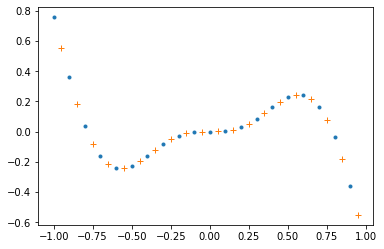

In [5]:
plt.plot(x_train,y_train,'.')
plt.plot(x_test,y_test,'+')

In [6]:
#转化为GPU Tensor
if USE_CUDA:
    x_train = x_train.cuda()
    y_train = y_train.cuda()
    x_test = x_test.cuda()
    y_test = y_test.cuda()

In [7]:
#训练模型
for epoch in range(50000):
    y_pred = model(x_train.float())
    loss = loss_fn(y_train,y_pred)

    if epoch % 200 == 0:
        print("Epoch", epoch, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch 0 0.5553616111476408
Epoch 200 0.055656740111201405
Epoch 400 0.05390810276246136
Epoch 600 0.04900949478280852
Epoch 800 0.04667142499634185
Epoch 1000 0.04463190238688568
Epoch 1200 0.041890238250864346
Epoch 1400 0.03591078262366149
Epoch 1600 0.019845991525121797
Epoch 1800 0.010710998147734402
Epoch 2000 0.009554563568572955
Epoch 2200 0.008948139325679168
Epoch 2400 0.00850605916468368
Epoch 2600 0.008131080184561795
Epoch 2800 0.007789288402515443
Epoch 3000 0.0074670013267198925
Epoch 3200 0.007157130716854084
Epoch 3400 0.00685455570216713
Epoch 3600 0.006554352731422729
Epoch 3800 0.006251284140805593
Epoch 4000 0.00593999559397993
Epoch 4200 0.005615831573312288
Epoch 4400 0.005276147785243264
Epoch 4600 0.004921419650693182
Epoch 4800 0.004555842003652462
Epoch 5000 0.004188240996241981
Epoch 5200 0.0038286046008237625
Epoch 5400 0.003487147747975657
Epoch 5600 0.0031698418738057474
Epoch 5800 0.002884585569639972
Epoch 6000 0.002633353242218383
Epoch 6200 0.002416381

In [8]:
torch.save(model,"LinearReg.pth")
#用训练好的模型进行计算
with torch.no_grad():
    y_pred = model(x_test.float())


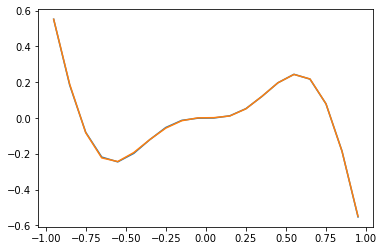

In [9]:
plt.plot(x_test.cpu(),y_test.cpu())
plt.plot(x_test.cpu(),y_pred.cpu())

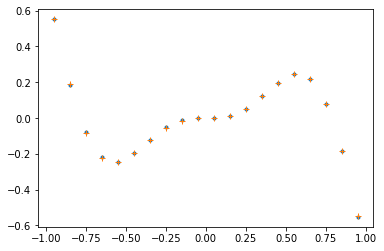

In [10]:
plt.plot(x_test.cpu(),y_test.cpu(),'.')
plt.plot(x_test.cpu(),y_pred.cpu(),'+')

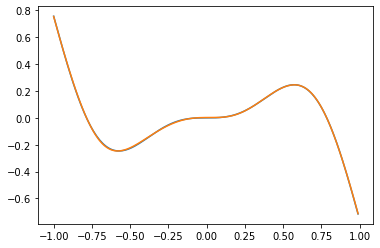

In [11]:
x = np.arange(-1,1,0.01)
y = list(map(lambda x : x*x*math.sin(4*x), x))

x = torch.tensor(x).reshape(-1,1).cuda()
y = torch.tensor(y).reshape(-1,1).cuda()

with torch.no_grad():
    y_p = model(x.float())

plt.plot(x.cpu(),y.cpu())
plt.plot(x.cpu(),y_p.cpu())

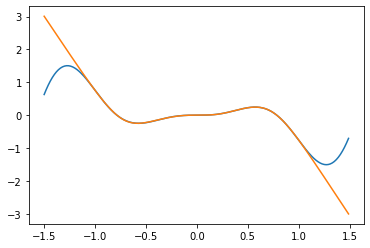

In [12]:
x1 = np.arange(-1.5,1.5,0.01)
y1 = list(map(lambda x : x*x*math.sin(4*x), x1))

x1 = torch.tensor(x1).reshape(-1,1).cuda()
y1 = torch.tensor(y1).reshape(-1,1).cuda()

with torch.no_grad():
    y1_p = model(x1.float())

plt.plot(x1.cpu(),y1.cpu())
plt.plot(x1.cpu(),y1_p.cpu())